Gradient Huber Loss : Piecewise((y_pred - y_true, delta >= Abs(y_pred - y_true)), (delta*((re(y_pred) - re(y_true))*Derivative(re(y_pred), y_pred) + (im(y_pred) - im(y_true))*Derivative(im(y_pred), y_pred))*sign(y_pred - y_true)/(y_pred - y_true), True))
Huber Loss est convexe car la Hessienne >= 0 dans chaque partie


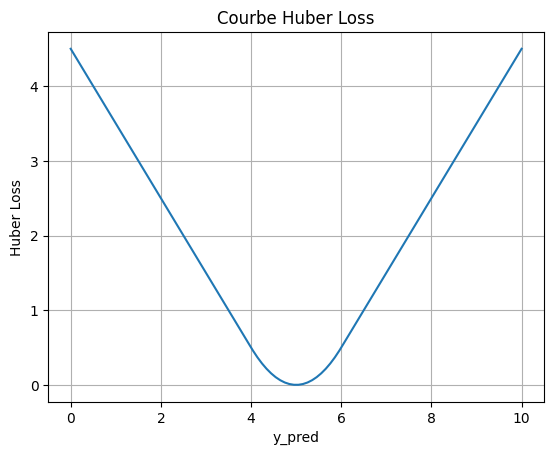

Equation de la tangente : x*(x - 1)/2 + 2*y*(y - 0.5)


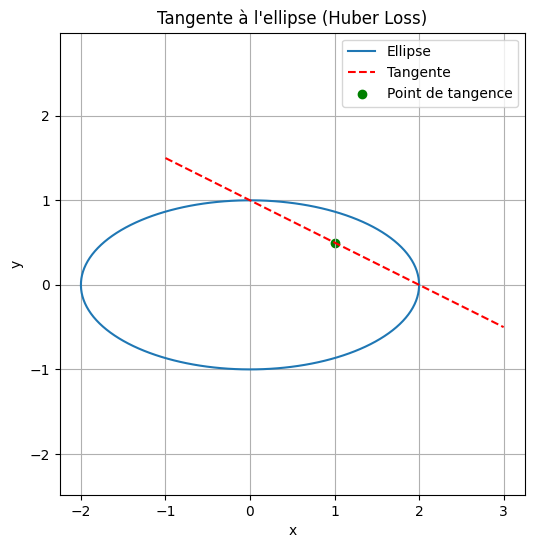

In [1]:


# Import des bibliothèques
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


# Jeu de données : Wine Quality (régression)
df_wine = pd.read_csv("./data/wine+quality/winequality-red.csv", sep=';')
X_reg = df_wine[['fixed acidity','volatile acidity']].head(50)
y_reg = df_wine['quality'].head(50)

# Définition symbolique de la Huber Loss
y_pred, y_true, delta = sp.symbols('y_pred y_true delta')
L_reg = sp.Piecewise(
    ((y_pred - y_true)**2 / 2, sp.Abs(y_pred - y_true) <= delta),
    (delta*sp.Abs(y_pred - y_true) - delta**2/2, True)
)

# Gradient Huber Loss
grad_reg = sp.diff(L_reg, y_pred)
print("Gradient Huber Loss :", grad_reg)

# Convexité
print("Huber Loss est convexe car la Hessienne >= 0 dans chaque partie")

# Courbe Huber Loss
y_true_val = 5
delta_val = 1
L_func_reg = sp.lambdify(y_pred, L_reg.subs({y_true: y_true_val, delta: delta_val}), 'numpy')
y_pred_vals = np.linspace(y_true_val-5, y_true_val+5, 100)

plt.figure()
plt.plot(y_pred_vals, L_func_reg(y_pred_vals))
plt.xlabel('y_pred')
plt.ylabel('Huber Loss')
plt.title('Courbe Huber Loss')
plt.grid(True)
plt.show()

# Tangente à une ellipse
x, y = sp.symbols('x y')
a, b = 2, 1
x0_val, y0_val = 1, 0.5

# Equation de l'ellipse
ellipse = x**2/a**2 + y**2/b**2 - 1

# Gradient de l'ellipse
grad_ellipse = [sp.diff(ellipse, var) for var in (x,y)]

# Equation de la tangente
tangent_eq = grad_ellipse[0]*(x - x0_val) + grad_ellipse[1]*(y - y0_val)
print("Equation de la tangente :", tangent_eq)

# Visualisation de l'ellipse et de la tangente
slope = -grad_ellipse[0].subs({x:x0_val, y:y0_val}) / grad_ellipse[1].subs({x:x0_val, y:y0_val})
intercept = y0_val - slope*x0_val
def tangent_func(x_val):
    return slope*x_val + intercept

theta = np.linspace(0, 2*np.pi, 300)
x_ellipse = a * np.cos(theta)
y_ellipse = b * np.sin(theta)

x_tangent = np.linspace(x0_val-2, x0_val+2, 100)
y_tangent = tangent_func(x_tangent)

plt.figure(figsize=(6,6))
plt.plot(x_ellipse, y_ellipse, label='Ellipse')
plt.plot(x_tangent, y_tangent, 'r--', label='Tangente')
plt.scatter([x0_val], [y0_val], color='green', label='Point de tangence')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tangente à l\'ellipse (Huber Loss)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()
